<h1>FD001 Tuned CNN Model Training</h1>
<ul>
    <li>Loading training and validation data</li>
    <li>Loading tuned model (best model from hyper tuning trials)</li>
    <li>Tuned model training</li>
    <li>Saving trained model</li>
    <li>Displaying training model metrics</li>
    <li>Creation of a .zip file for uploading to Google Drive</li>
</ul>

In [1]:
from tools import *

devices: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [2]:
prepare_dirs(task='tuned-training')

Downloading...
From (original): https://drive.google.com/uc?id=107rKeqyMaDncCk6jpbyyCX86xzbMSiDU
From (redirected): https://drive.google.com/uc?id=107rKeqyMaDncCk6jpbyyCX86xzbMSiDU&confirm=t&uuid=0d61b045-accb-4039-80fa-4ea7fd13420e
To: D:\virtualenv\src\thesis\cmapss\tuning\cnn\input\models\FD001.zip
100%|███████████████████████████████████████████████████████████████████████████████| 150M/150M [00:18<00:00, 8.19MB/s]


Extracting FD001.zip...
Extraction complete: ./input\models


Downloading...
From (original): https://drive.google.com/uc?id=1TnV9sAX2My-R3iSGamX3rVAezoBsGY_M
From (redirected): https://drive.google.com/uc?id=1TnV9sAX2My-R3iSGamX3rVAezoBsGY_M&confirm=t&uuid=c77cae46-8269-4eb2-917f-7d92dde7a942
To: D:\virtualenv\src\thesis\cmapss\tuning\cnn\input\CMAPSSData\FD001.zip
100%|█████████████████████████████████████████████████████████████████████████████| 29.5M/29.5M [00:03<00:00, 8.21MB/s]


Extracting FD001.zip...
Extraction complete: ./input\CMAPSSData
Input directory
'./input'
URL input dataset
'https://drive.google.com/file/d/1LU1DQuv7_CzBy2_Abgjg3HsvNDme361O/view?usp=drive_link'
Input dataset directory
'./input\\CMAPSSData'
Output directory
'./working'
Output models directory
'./working\\models'
Output plots directory
'./working\\plots'


<h2>Loading training and validation data</h2>

In [3]:
data_ftype = '.npy'

ts_train_features_name = 'ts_train_features' + data_ftype
ts_train_features_path = os.path.join(dataset_dir, ts_train_features_name)
ts_train_targets_name = 'ts_train_targets' + data_ftype
ts_train_targets_path = os.path.join(dataset_dir, ts_train_targets_name)

ts_val_features_name = 'ts_val_features' + data_ftype
ts_val_features_path = os.path.join(dataset_dir, ts_val_features_name)
ts_val_targets_name = 'ts_val_targets' + data_ftype
ts_val_targets_path = os.path.join(dataset_dir, ts_val_targets_name)

ts_test_features_name = 'ts_test_features' + data_ftype
ts_test_features_path = os.path.join(dataset_dir, ts_test_features_name)
ts_test_targets_name = 'ts_test_targets' + data_ftype
ts_test_targets_path = os.path.join(dataset_dir, ts_test_targets_name)

ts_train_features = np.load(ts_train_features_path)
ts_train_targets = np.load(ts_train_targets_path)

ts_val_features = np.load(ts_val_features_path)
ts_val_targets = np.load(ts_val_targets_path)

ts_test_features = np.load(ts_test_features_path)
ts_test_targets = np.load(ts_test_targets_path)


nprint("Training features shape", ts_train_features.shape)
nprint("Training targets shape", ts_train_targets.shape)
nprint("Validation features shape", ts_val_features.shape)
nprint("Validation targets shape", ts_val_targets.shape)
nprint("Testing features shape", ts_test_features.shape)
nprint("Testing targets shape", ts_test_targets.shape)

Training features shape
(14184, 30, 14)
Training targets shape
(14184,)
Validation features shape
(3547, 30, 14)
Validation targets shape
(3547,)
Testing features shape
(497, 30, 14)
Testing targets shape
(100,)


<h2>Loading tuned model (best model from hyper tuning trials)</h2>

In [4]:
num_conv1d_layers_bounds = [1, 3]
num_conv1d_filters_bounds = [64, 512, 32]
num_dense_layers_bounds = [1, 2]
num_dense_units_bounds = [64, 512, 32]
initial_lr_bounds = [1e-4, 1e-2]
batch_size_bounds = [32, 128, 32]

rule_hp = RULEstimator_HyperModel(
    window_length=window_length, 
    num_features=ts_train_features.shape[2], 
    num_targets=1 if len(ts_train_targets.shape)==1 else ts_train_targets.shape[1], 
    num_conv1d_layers_bounds=num_conv1d_layers_bounds, 
    num_conv1d_filters_bounds=num_conv1d_filters_bounds, 
    num_dense_layers_bounds=num_dense_layers_bounds, 
    num_dense_units_bounds=num_dense_units_bounds, 
    initial_lr_bounds=initial_lr_bounds,
    batch_size_bounds=batch_size_bounds
)
rule_hp.build(kt.HyperParameters())


with tensorflow.device('/GPU:0'):
    tuner = kt.Hyperband(
        hypermodel=rule_hp,
        objective='val_loss',
        max_epochs=max_epochs,
        factor=factor,
        directory=in_dir,
        project_name=models_name,
    )
tuner.reload()
tuner.get_best_models()[0].summary()

Reloading Tuner from ./input\models\tuner0.json



D:\virtualenv\myenv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30, 14)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 26, 96)              │           6,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 256)             │         123,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 20, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 480)                 │         123,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             481 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450,657 (1.72 MB)

 Trainable params: 450,657 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

<h2>Tuned model training</h2>

In [5]:
besthyperparameters = tuner.get_best_hyperparameters()[0]
nprint('besthyperparameters.values', besthyperparameters.values)
model = tuner.hypermodel.build(besthyperparameters)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler = callbacks.LearningRateScheduler(scheduler_training, verbose=verbose)
start_time = time.time()
nprint('Training started: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
with tensorflow.device('/GPU:0'):
    history = model.fit(
        ts_train_features, 
        ts_train_targets, 
        epochs=epochs, 
        validation_data=(
            ts_val_features, 
            ts_val_targets
        ), 
        verbose=verbose,
        batch_size=besthyperparameters.values['batch_size'],
        callbacks=[
            early_stopping, 
            lr_scheduler
        ]
    )
nprint('Training ended: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
end_time = time.time()
training_duration = end_time - start_time
nprint('Training duration', '{:.2f} seconds'.format(training_duration))

besthyperparameters.values
{'batch_size': 32,
 'conv_filters_0': 96,
 'conv_filters_1': 256,
 'conv_filters_2': 256,
 'conv_kernel_size_0': 5,
 'conv_kernel_size_1': 5,
 'conv_kernel_size_2': 3,
 'dense_units_0': 480,
 'dense_units_1': 128,
 'initial_lr': 0.0013117452857213854,
 'num_conv_layers': 3,
 'num_dense_layers': 1,
 'tuner/bracket': 2,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}
Training started: 
'2024-12-04 19:35:00'

Epoch 1: LearningRateScheduler setting learning rate to 0.001311745261773467.
Epoch 1/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 1198.6359 - val_loss: 459.1524 - learning_rate: 0.0013

Epoch 2: LearningRateScheduler setting learning rate to 0.001311745261773467.
Epoch 2/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 380.7833 - val_loss: 251.2752 - learning_rate: 0.0013

Epoch 3: LearningRateScheduler setting learning rate to 0.001311745261773467.
Epoch 3/100
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms

<h2>Saving trained model</h2>

In [6]:
modeltype = 'CNN'

cnn_model_name = '{}_{}'.format(dataset_name, modeltype)
cnn_model_files_dir = os.path.join(out_models_dir, cnn_model_name)
os.makedirs(cnn_model_files_dir)

In [7]:
ftype = 'keras'
cnn_model_file_name = '{}.{}'.format(cnn_model_name, ftype)
cnn_model_path = os.path.join(cnn_model_files_dir, cnn_model_file_name)
model.save(filepath=cnn_model_path)
nprint('CNN model path', cnn_model_path)

CNN model path
'./working\\models\\FD001_CNN\\FD001_CNN.keras'


<h2>Displaying training model metrics</h2>

CNN model history path
'./working\\models\\FD001_CNN\\FD001_CNN_history.json'
    loss  val_loss  learning_rate  epoch
6.814451  9.036690       0.000013     87
6.710324  8.996374       0.000013     88
6.706924  8.940519       0.000013     89
6.694739  8.954231       0.000013     90
6.662977  9.080371       0.000013     91


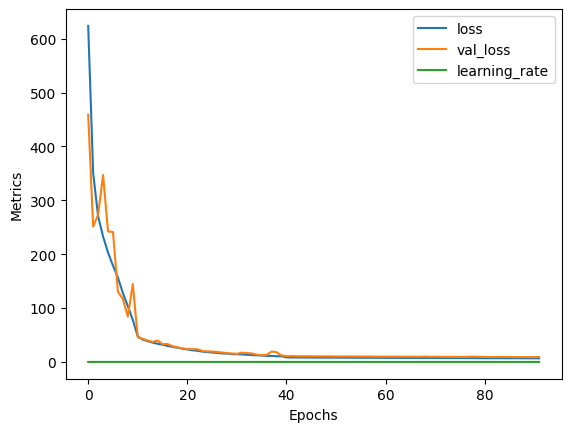

In [8]:
ftype = 'json'
cnn_model_history_name = '{}_{}_{}.{}'.format(dataset_name, modeltype, 'history', ftype) 
cnn_model_history_path = os.path.join(cnn_model_files_dir, cnn_model_history_name)
with open(cnn_model_history_path, "w") as file: 
    json.dump({'history': history.history}, file, indent=4)
nprint('CNN model history path', cnn_model_history_path)
display_training_performance(history)

<h2>Creation of a .zip file for uploading to Google Drive</h2>

In [9]:
ftype = 'zip'
shutil.make_archive(cnn_model_files_dir, ftype, cnn_model_files_dir)
shutil.rmtree(cnn_model_files_dir)